# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [1]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
# Import API key
from api_keys import geoapify_key

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("../output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,wynyard,-41.0000,145.7167,6.66,82,52,6.51,AU,1694124482
1,1,grytviken,-54.2811,-36.5092,-2.89,81,52,6.67,GS,1694124482
2,2,papatowai,-46.5619,169.4708,13.24,59,52,1.90,NZ,1694124482
3,3,port-aux-francais,-49.3500,70.2167,3.05,81,100,18.84,TF,1694124483
4,4,haiku-pauwela,20.9219,-156.3051,28.01,66,20,9.26,US,1694124483


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

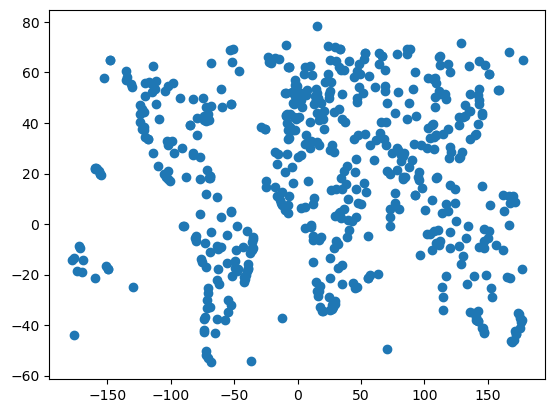

In [3]:
%%capture --no-display

# Configure the map plot
plt.scatter(city_data_df['Lon'],city_data_df['Lat'])

# Display the map
# YOUR CODE HERE

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [4]:
# Narrow down cities that fit criteria and drop any results with null values
ideal_city_df = city_data_df[(city_data_df['Max Temp']<27)&
                             (city_data_df['Max Temp']>21)&
                             (city_data_df['Wind Speed']<4.5)&
                             (city_data_df['Cloudiness']==0)]

# Drop any rows with null values

# Display sample data
ideal_city_df

,City_ID,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
7,7,lompoc,34.6391,-120.4579,25.99,67,0,4.12,US,1694124484
22,22,havre,49.5833,0.3333,22.87,83,0,2.06,FR,1694124489
43,43,zaragoza,41.6561,-0.8773,25.25,52,0,3.09,ES,1694124494
75,75,tanga,-5.0667,39.1000,22.76,87,0,1.87,TZ,1694124500
83,83,colonia,50.9333,6.9500,22.68,75,0,1.03,DE,1694124502
123,123,chikwawa,-16.0335,34.8009,23.44,52,0,1.90,MW,1694124512
133,133,shindand,33.3029,62.1474,23.06,15,0,1.91,AF,1694124515
139,139,loango,-4.6719,11.8312,22.71,90,0,3.26,CG,1694124516
351,351,monte carmelo,-18.7247,-47.4986,23.13,31,0,2.54,BR,1694124399
420,420,huesca,42.1362,-0.4087,21.70,60,0,2.68,ES,1694124584


### Step 3: Create a new DataFrame called `hotel_df`.

In [5]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
hotel_df = ideal_city_df[['City','Country', 'Lat','Lon','Humidity']]

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df['Hotel Name'] = ''
# Display sample data
hotel_df

C:\Users\Matt\AppData\Local\Temp\ipykernel_16160\3865242569.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['Hotel Name'] = ''


,City,Country,Lat,Lon,Humidity,Hotel Name
7,lompoc,US,34.6391,-120.4579,67,
22,havre,FR,49.5833,0.3333,83,
43,zaragoza,ES,41.6561,-0.8773,52,
75,tanga,TZ,-5.0667,39.1000,87,
83,colonia,DE,50.9333,6.9500,75,
123,chikwawa,MW,-16.0335,34.8009,52,
133,shindand,AF,33.3029,62.1474,15,
139,loango,CG,-4.6719,11.8312,90,
351,monte carmelo,BR,-18.7247,-47.4986,31,
420,huesca,ES,42.1362,-0.4087,60,


In [14]:
# Target city
target_city = "Kansas City, MO"

# Build the endpoint URL
target_url = f"https://api.geoapify.com/v1/geocode/search?text={target_city}&format=json&apiKey={geoapify_key}"
geo_data = requests.get(target_url).json()
lat = geo_data["results"][0]["lat"]
lon = geo_data["results"][0]["lon"]
print(lat,lon)

39.100105 -94.5781416


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [25]:
# Set parameters to search for a hotel
radius = 10000
limit = 20    



# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    lat = row['Lat']
    lon = row['Lon']

    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    filters =  f"circle:{lon},{lat},{radius}"
    bias = f"proximity:{lon},{lat}"
    category = "accommodation.hotel"
    params = {"filter":filters,"limit":limit,"bias":bias,"categories":category,"apiKey":geoapify_key}
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"
    # Make and API request using the params dictionaty
    name_address = requests.get(base_url, params=params)
    # Convert the API response to JSON format
    name_address = name_address.json()
    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

Starting hotel search
lompoc - nearest hotel: Embassy Suites by Hilton Lompoc Central Coast
havre - nearest hotel: Le Relais des 2 Normandies
zaragoza - nearest hotel: Hotel Pilar Plaza
tanga - nearest hotel: Nyumbani Hotel & Reasort
colonia - nearest hotel: Wasserturm Hotel Cologne
chikwawa - nearest hotel: Memories Lodge
shindand - nearest hotel: No hotel found
loango - nearest hotel: Hotel des Aigles
monte carmelo - nearest hotel: Hotel Dona Wanda
huesca - nearest hotel: Hostal Ordesa
vazante - nearest hotel: Kabana
semnan - nearest hotel: مرکز آموزشی رفاهی فرهنگیان - خانه معلم
orosei - nearest hotel: Hotel Mannois
tataouine - nearest hotel: No hotel found
prado - nearest hotel: Pousada Recanto do Prado
montmagny - nearest hotel: Entreprises val de france
grenada - nearest hotel: Allegro Granada
pontalina - nearest hotel: No hotel found
zhob - nearest hotel: No hotel found
soio - nearest hotel: Hotel Maria Teres


,City,Country,Lat,Lon,Humidity,Hotel Name
7,lompoc,US,34.6391,-120.4579,67,Embassy Suites by Hilton Lompoc Central Coast
22,havre,FR,49.5833,0.3333,83,Le Relais des 2 Normandies
43,zaragoza,ES,41.6561,-0.8773,52,Hotel Pilar Plaza
75,tanga,TZ,-5.0667,39.1000,87,Nyumbani Hotel & Reasort
83,colonia,DE,50.9333,6.9500,75,Wasserturm Hotel Cologne
123,chikwawa,MW,-16.0335,34.8009,52,Memories Lodge
133,shindand,AF,33.3029,62.1474,15,No hotel found
139,loango,CG,-4.6719,11.8312,90,Hotel des Aigles
351,monte carmelo,BR,-18.7247,-47.4986,31,Hotel Dona Wanda
420,huesca,ES,42.1362,-0.4087,60,Hostal Ordesa


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [7]:
%%capture --no-display

# Configure the map plot
# YOUR CODE HERE

# Display the map
# YOUR CODE HERE